In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import shin_metiu_full as sf
import ipywidgets as widgets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from exact_simulator import simulation, prep_ham, prepare_state, inner
import warnings
from matplotlib import ticker


warnings.filterwarnings("ignore")
sns.set_context(
    "paper",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)

In [7]:
results = []
# factors = [1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
factors = [0,1e-5,1e-4,1e-3,1e-2,1e-1,1]
# factors = [1,2,3,4,5,6,-1,-2,-3,-4,-5,-6,0]


for i in factors:
    results.append(simulation(
        .5,
        1000,
        r_f=5,
        r_l=4,
        r_r=3.2,
        resolution=16,
        L=19,
        x_0=-2,
        v_0=0.00114,
        vector = [0],
        padding=40,
        parameterized=False,
        obs_error = i # Multiplicative
    ))
    
def float_to_latex(f,precision=0,exp_digits=1):
    from numpy import format_float_scientific
    if isinstance(f, (list, tuple)):
        return ['$' + format_float_scientific(i, precision=precision, exp_digits=exp_digits).replace('e', '\\cdot 10^{').replace('.','') + '}$'
                for i in f]
    elif isinstance(f, np.ndarray):
        return np.array(['$' + format_float_scientific(i, precision=precision, exp_digits=exp_digits).replace('e', '\\cdot 10^{').replace('.','') + '}$'
                         for i in f])
    else:
        return '$' + format_float_scientific(f, precision=precision, exp_digits=exp_digits).replace('e', '\\cdot 10^{').replace('.','') + '}$'
float_to_latex(factors)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 

fidelities = []
for i in range(len(results)-1):
    fidelities.append([])
    for j in range(1000):
        fidelities[i].append(1-np.abs(np.dot(results[0].store_psi[j],np.conj(results[i+1].store_psi[j])))**2)
fidelities = np.array(fidelities).T

df = pd.DataFrame(data = fidelities[1:],columns=float_to_latex(factors[1:]))
df  = df.reset_index()
df  = df.rename(columns={'index':'Timestep'})
df = df.melt(id_vars='Timestep')
df  = df.rename(columns={'value':'Fidelity','variable':'Error factor'})


# Figure S2

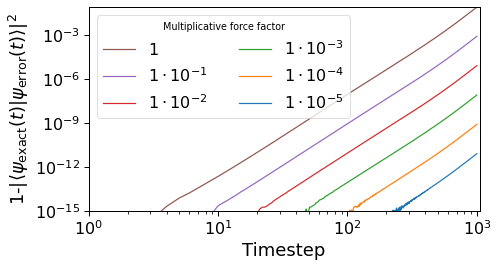

In [8]:
fig, ax = plt.subplots(figsize=((7, 4)))
sns.lineplot(data=df,x='Timestep',y='Fidelity',ci=None,hue='Error factor',ax=ax)
ax.set(ylabel=r'1-$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{error}(t)\rangle\right |^2 $',xlabel= r'Timestep',ylim=1e-15,xlim=1)
handles, labels = plt.gca().get_legend_handles_labels()
labels[-1]='$1$'
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles=handles, labels=labels, ncol=2,title='Multiplicative force factor')
plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
# plt.savefig('additional_plots/force_error.pdf')

In [15]:
results = []
# factors = [1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
factors = [0,1e-5,1e-6,1e-7,1e-8]
# factors = [1,2,3,4,5,6]


for i in factors:
    results.append(simulation(
        .5,
        1000,
        r_f=5,
        r_l=4,
        r_r=3.2,
        resolution=16,
        L=19,
        x_0=-2,
        v_0=0.00114,
        vector = [0],
        padding=40,
        parameterized=False,
        sum_error = i # Additive
    ))
    
def float_to_latex(f,precision=0,exp_digits=1):
    from numpy import format_float_scientific
    if isinstance(f, (list, tuple)):
        return ['$' + format_float_scientific(i, precision=precision, exp_digits=exp_digits).replace('e', '\\cdot 10^{').replace('.','') + '}$'
                for i in f]
    elif isinstance(f, np.ndarray):
        return np.array(['$' + format_float_scientific(i, precision=precision, exp_digits=exp_digits).replace('e', '\\cdot 10^{').replace('.','') + '}$'
                         for i in f])
    else:
        return '$' + format_float_scientific(f, precision=precision, exp_digits=exp_digits).replace('e', '\\cdot 10^{').replace('.','') + '}$'
float_to_latex(factors)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 

fidelities = []
for i in range(len(results)-1):
    fidelities.append([])
    for j in range(1000):
        fidelities[i].append(1-np.abs(np.dot(results[0].store_psi[j],np.conj(results[i+1].store_psi[j])))**2)
fidelities = np.array(fidelities).T

df = pd.DataFrame(data = fidelities[1:],columns=float_to_latex(factors[1:]))
df  = df.reset_index()
df  = df.rename(columns={'index':'Timestep'})
df = df.melt(id_vars='Timestep')
df  = df.rename(columns={'value':'Fidelity','variable':'Error factor'})


# Figure S1

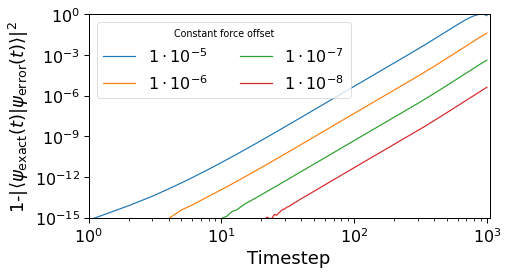

In [16]:
fig, ax = plt.subplots(figsize=((7, 4)))
sns.lineplot(data=df,x='Timestep',y='Fidelity',ci=None,hue='Error factor',ax=ax)
ax.set(ylabel=r'1-$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{error}(t)\rangle\right |^2 $',xlabel= r'Timestep',ylim=1e-15,xlim=1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=2,title='Constant force offset')
plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
